# Package loading and basic configurations

In [18]:
%load_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd
import folium
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.embed import file_html
from bokeh.resources import CDN

import bokeh.sampledata
bokeh.sampledata.download()
from bokeh.sampledata.glucose import data


from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using data directory: /Users/sebastiangarzon/.bokeh/data
Downloading: CGM.csv (1589982 bytes)
   1589982 [100.00%]
Downloading: US_Counties.zip (3171836 bytes)
   3171836 [100.00%]
Unpacking: US_Counties.csv
Downloading: us_cities.json (713565 bytes)
    713565 [100.00%]
Downloading: unemployment09.csv (253301 bytes)
    253301 [100.00%]
Downloading: AAPL.csv (166698 bytes)
    166698 [100.00%]
Downloading: FB.csv (9706 bytes)
      9706 [100.00%]
Downloading: GOOG.csv (113894 bytes)
    113894 [100.00%]
Downloading: IBM.csv (165625 bytes)
    165625 [100.00%]
Downloading: MSFT.csv (161614 bytes)
    161614 [100.00%]
Downloading: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip (4816256 bytes)
   4816256 [100.00%]
Unpacking: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.csv
Downloading: gapminder_fertility.csv (64346 bytes)
     64346 [100.00%]
Downloading: gapminder_population.csv (94509 bytes)
     94509 [10

# Querying enviroCar Tracks

The following cell queries tracks from the enviroCar API. It defines a bbox for the area of Münster (Germany) and requests 50 tracks. The result is a GeoDataFrame, which is a geo-extended Pandas dataframe from the GeoPandas library. It contains all information of the track in a flat dataframe format including a specific geometry column. 

In [2]:
bbox = BboxSelector([
    7.601165771484375, # min_x
    51.94807412325402, # min_y
    7.648200988769531, # max_x
    51.97261482608728  # max_y
])

# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=50) # requesting 50 tracks inside the bbox
track_df

,id,time,geometry,GPS PDOP.value,GPS PDOP.unit,Speed.value,Speed.unit,GPS Altitude.value,GPS Altitude.unit,GPS Bearing.value,...,Consumption.value,Consumption.unit,track.appVersion,track.touVersion,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit,MAF.value,MAF.unit,O2 Lambda Voltage.value,O2 Lambda Voltage.unit
0,5e8b930965b80c5d6b4d7cd1,2020-03-07T12:33:15,POINT (7.64069 51.95733),1.090631,precision,28.999999,km/h,110.381939,m,124.858622,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5e8b930965b80c5d6b4d7cd3,2020-03-07T12:33:20,POINT (7.64118 51.95712),1.000000,precision,28.000000,km/h,108.260375,m,125.020801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5e8b930965b80c5d6b4d7cd4,2020-03-07T12:33:26,POINT (7.64162 51.95690),1.257198,precision,28.000001,km/h,105.826028,m,121.203960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5e8b930965b80c5d6b4d7cd5,2020-03-07T12:33:31,POINT (7.64210 51.95672),1.000000,precision,30.000000,km/h,104.395998,m,123.412759,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5e8b930965b80c5d6b4d7cd6,2020-03-07T12:33:36,POINT (7.64264 51.95650),1.026727,precision,31.409419,km/h,101.516865,m,122.170479,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,5dc986e844ea856b702e3e0b,2019-10-28T16:34:55,POINT (7.59523 51.96505),1.700000,precision,47.999999,km/h,109.652212,m,276.419653,...,3.122268,l/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,5dc986e844ea856b702e3e0c,2019-10-28T16:35:00,POINT (7.59425 51.96512),1.497088,precision,48.297297,km/h,110.122771,m,276.271049,...,2.853618,l/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,5dc986e844ea856b702e3e0d,2019-10-28T16:35:05,POINT (7.59327 51.96518),1.688911,precision,49.000001,km/h,110.573987,m,275.808021,...,4.657916,l/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,5dc986e844ea856b702e3e0e,2019-10-28T16:35:10,POINT (7.59225 51.96525),1.300000,precision,51.000000,km/h,111.140661,m,275.411387,...,3.445271,l/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


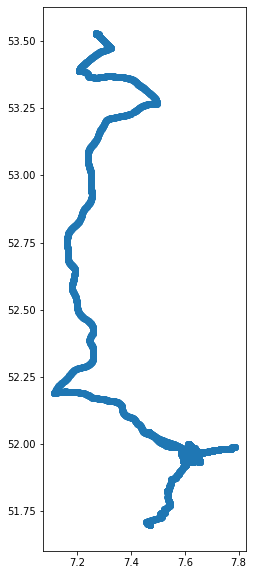

In [4]:
track_df.plot(figsize=(8, 10))

# Inspecting a single Track

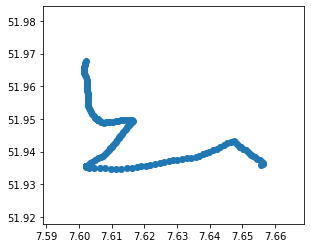

In [52]:
some_track_id = track_df['track.id'].unique()[5]
some_track = track_df[track_df['track.id'] == some_track_id]
some_track.plot()

## Interactive Map
The following map-based visualization makes use of folium. It allows to visualizate geospatial data based on an interactive leaflet map. Since the data in the GeoDataframe is modelled as a set of Point instead of a LineString, we have to manually create a polyline

In [148]:
import folium
import branca

lats = list(some_track['geometry'].apply(lambda coord: coord.y))
lngs = list(some_track['geometry'].apply(lambda coord: coord.x))

avg_lat = sum(lats) / len(lats)
avg_lngs = sum(lngs) / len(lngs)

x=some_track['time']
y=some_track['Speed.value']
x=[s.replace('T',' ') for s in (x)]
x= pd.Series(x)
x=pd.to_datetime(x)

# create a new plot with figure
chart = figure(x_axis_type="datetime",plot_width=450, plot_height=275)
chart.line(x,y,line_width=2)

html = file_html(chart, CDN, "Speed value")
iframe = branca.element.IFrame(html=html, width=500, height=300)
popup = folium.Popup(iframe)


m = folium.Map(location=[avg_lat, avg_lngs], zoom_start=13)
folium.PolyLine([coords for coords in zip(lats, lngs)],popup=popup, color='blue').add_to(m)
m

In [141]:
html

'\n\n\n\n<!DOCTYPE html>\n<html lang="en">\n  \n  <head>\n    \n      <meta charset="utf-8">\n      <title>Speed value</title>\n      \n      \n        \n          \n        \n        \n          \n        <script type="text/javascript" src="https://cdn.pydata.org/bokeh/release/bokeh-1.4.0.min.js"></script>\n        <script type="text/javascript">\n            Bokeh.set_log_level("info");\n        </script>\n        \n      \n      \n    \n  </head>\n  \n  \n  <body>\n    \n      \n        \n          \n          \n            \n              <div class="bk-root" id="b8804249-0a15-46bb-91ea-20d9a826c9eb" data-root-id="12087"></div>\n            \n          \n        \n      \n      \n        <script type="application/json" id="12376">\n          {"bc7a4d20-f6ea-4cf5-ae4e-df628e140ed1":{"roots":{"references":[{"attributes":{},"id":"12102","type":"BasicTicker"},{"attributes":{},"id":"12143","type":"YearsTicker"},{"attributes":{},"id":"12094","type":"LinearScale"},{"attributes":{"days":[1